<a href="https://colab.research.google.com/github/cyprus09/ie4483-cats-dogs/blob/alexnet-feature-model/Alexnet_IE4483.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = '/content/cats_dogs.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

### Model Description Function for AlexNet

In [ ]:
def alexnet_model():
    model = Sequential()
    # 1 convolution layer
    model.add(Conv2D(input_shape=(227,227,3), filters=96,kernel_size=(11,11),strides=(4,4),padding='valid'))
    model.add(Activation('relu'))

    # max pooling 1 layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2 convolution layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # max pooling 2 layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3 convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 4 convolution layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 5 convolution layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # max pooling 5 layer
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

    # dense layer
    model.add(Flatten())

    # 1 dense layer
    model.add(Dense(4096, input_shape=(6*6*256,)))
    model.add(Activation('relu'))

    # dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2 dense layer
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # drop out to prevent overfitting
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    # 3 dense layer
    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    # output layer
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

### Training

In [ ]:
def dataset_train_processing():
    data_path = '/content/cats_dogs/train'

    # Define data generators
    train_datagen = ImageDataGenerator(rotation_range=15,
                                       rescale=1./255,
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       width_shift_range=0.1,
                                       height_shift_range=0.1)
    validate_datagen = ImageDataGenerator(rescale=1./255)

    # Generate data for training and validation
    train_generator = train_datagen.flow_from_directory(directory=data_path,
                                                        target_size=(227, 227),
                                                        batch_size=15,
                                                        class_mode='categorical',
                                                        shuffle=True)  # Ensure shuffling for training

    validate_generator = validate_datagen.flow_from_directory(directory=data_path,
                                                              target_size=(227, 227),
                                                              batch_size=15,
                                                              class_mode='categorical',
                                                              shuffle=False)  # No need to shuffle validation data

    # Example of the data generator shown in the end
    X, Y = next(train_generator)
    plt.figure(figsize=(12,12))
    for i in range(0, 15):
        plt.subplot(5, 3, i + 1)
        plt.imshow(X[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Return generators and counts
    return train_generator, validate_generator, train_generator.samples, validate_generator.samples

### Training the model

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 9, 9, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 7, 7, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,843,706 (110.03 MB)

 Trainable params: 28,834,810 (110.00 MB)

 Non-trainable params: 8,896 (34.75 KB)

Found 4628 images belonging to 2 classes.
Found 4628 images belonging to 2 classes.


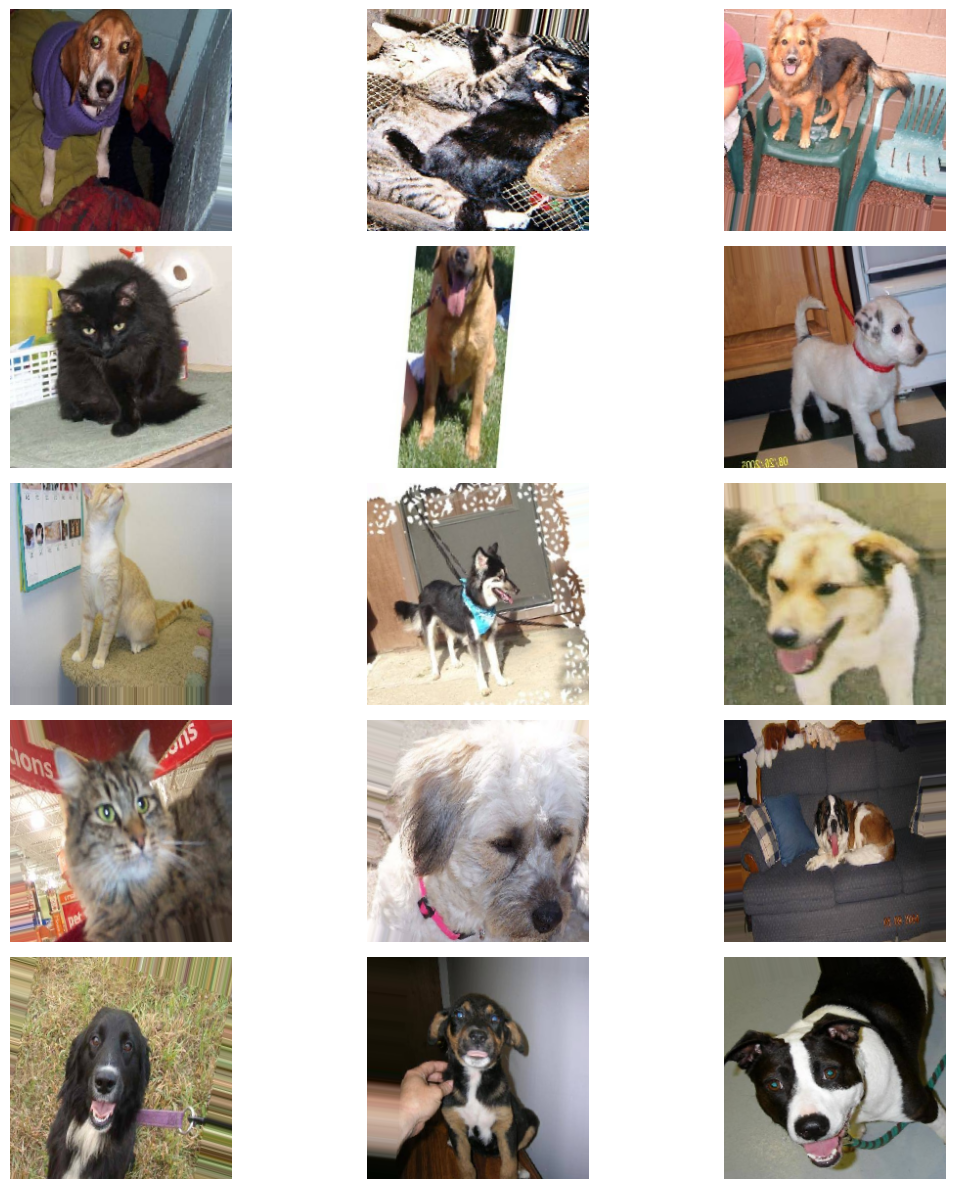

(15, 227, 227, 3) (15, 2)
(15, 227, 227, 3) (15, 2)
Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


308/308 ━━━━━━━━━━━━━━━━━━━━ 97s 271ms/step - accuracy: 0.5329 - loss: 1.3788 - val_accuracy: 0.5245 - val_loss: 0.7207
Epoch 2/35
  1/308 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7333 - loss: 0.5778

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7333 - loss: 0.5778 - val_accuracy: 0.2500 - val_loss: 1.0119
Epoch 3/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 79s 251ms/step - accuracy: 0.5204 - loss: 0.7242 - val_accuracy: 0.5758 - val_loss: 0.6807
Epoch 4/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.4667 - loss: 0.8029 - val_accuracy: 0.5000 - val_loss: 0.8134
Epoch 5/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 77s 247ms/step - accuracy: 0.5516 - loss: 0.6984 - val_accuracy: 0.5799 - val_loss: 0.6666
Epoch 6/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6000 - loss: 0.6609 - val_accuracy: 0.5000 - val_loss: 0.6700
Epoch 7/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 77s 248ms/step - accuracy: 0.5600 - loss: 0.6916 - val_accuracy: 0.5502 - val_loss: 0.7520
Epoch 8/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 0s 77us/step - accuracy: 0.6667 - loss: 0.6976 - val_accuracy: 0.3750 - val_loss: 0.9165
Epoch 9/35
308/308 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.5860 - loss: 0.6771 - val_accura

ValueError: The filename must end in `.weights.h5`. Received: filepath=/content/cats_dogs/cat_dog_alexnet.h5

In [ ]:
# Instantiate a model
model = alexnet_model()

# Process training data
train_gen, validate_gen, train_total, validate_total = dataset_train_processing()

# Inspect training and validation generators
for X, Y in train_gen:
    print(X.shape, Y.shape)
    break

for X, Y in validate_gen:
    print(X.shape, Y.shape)
    break

# Train model
batch_size = 15
epochs = 35
train_model = model.fit(train_gen,
                        epochs=epochs,
                        validation_data=validate_gen,
                        validation_steps=validate_total//batch_size,
                        steps_per_epoch=train_total//batch_size)
# Save model
model.save_weights('/content/cats_dogs/cat_dog_alexnet.h5')


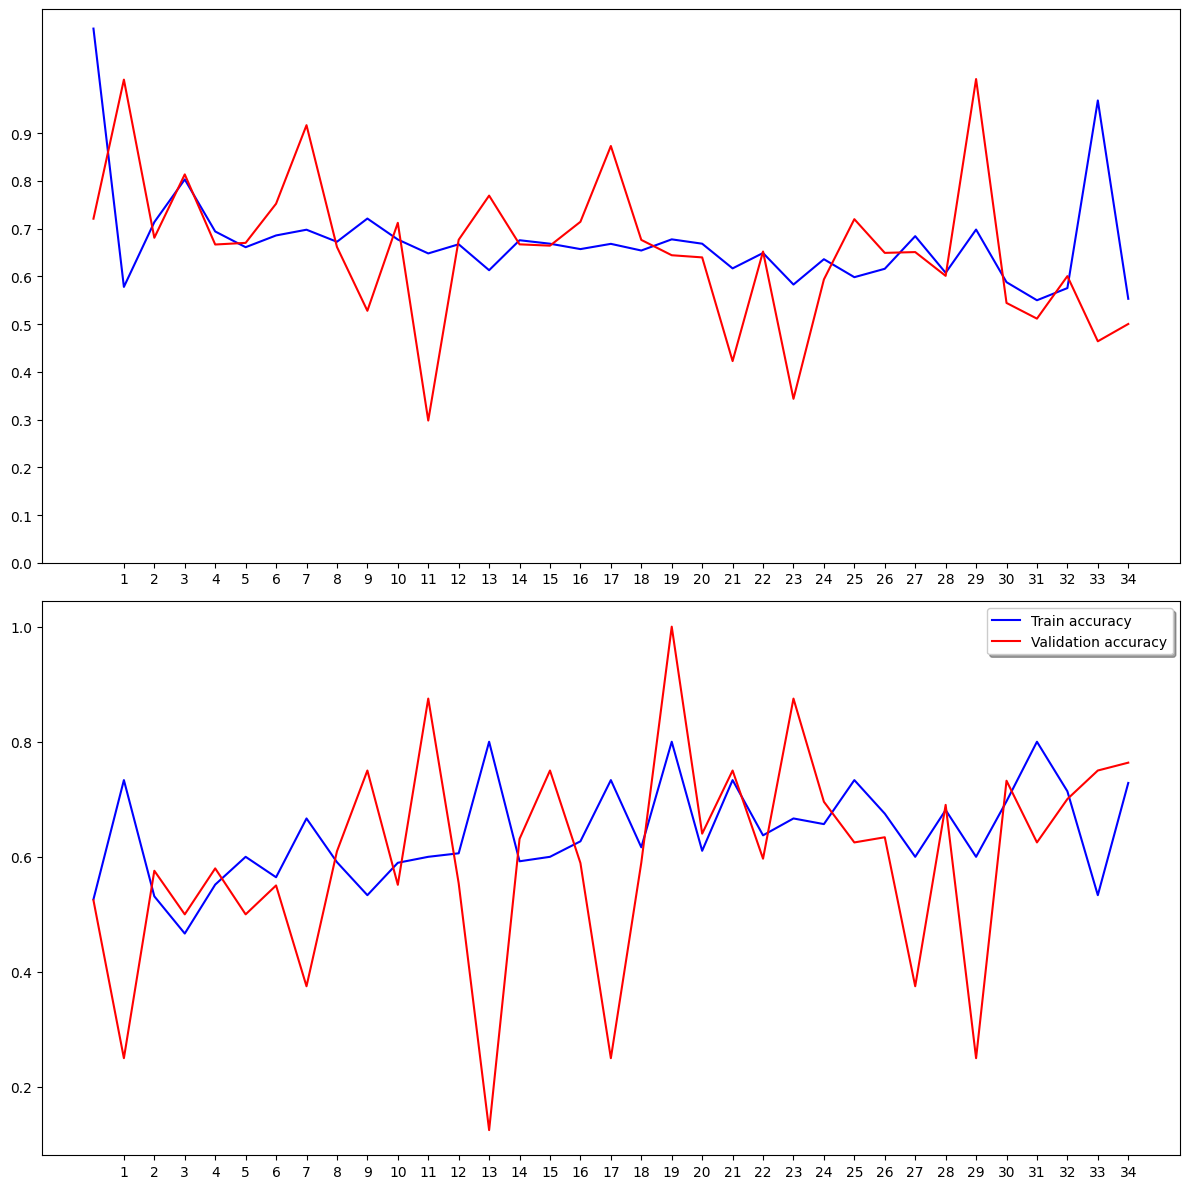

In [ ]:
# Graphing the result
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(train_model.history['loss'], color='b', label="Train loss")
ax1.plot(train_model.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(train_model.history['accuracy'], color='b', label="Train accuracy")
ax2.plot(train_model.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Test Data

In [ ]:
def dataset_test_processing():
    # Hardcode data path
    data_path = '/content/cats_dogs/test/'
    # process dataset and create a dataframe
    file_names = os.listdir(data_path)
    test_df = pd.DataFrame({
        'filename': file_names
    })

    # test_data generator
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_dataframe(test_df,
                                                     data_path,
                                                     x_col = 'filename',
                                                     y_col = None,
                                                     class_mode = None,
                                                     target_size = (227,227),
                                                     batch_size = 15,
                                                     shuffle = False)
    return test_generator, test_df

In [ ]:
# Generate test data and test dataframe
test_gen, test_df = dataset_test_processing()
test_total = test_df.shape[0]

# prediction from out trained model
prediction = model.predict_generator(test_gen, steps=np.ceil(test_total/batch_size))
# Prediction return list of probability for each classes
# argmax use to get average max for each row
test_df['label'] = np.argmax(prediction, axis=1)

# Getting label from our train_generator
label_map = dict((v,k) for k, v in train_gen.class_indices.items())
# replace all 0 : cat and 1 : dog
test_df['label'] = test_df['label'].replace(label_map)
test_df['filename'] = test_df['filename'].str.split('.').str[0]

# Print out all result
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(test_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/cats_dogs/test1/'